In [1]:
import zipfile
z=zipfile.ZipFile("archive.zip")
z.extractall()


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os,shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import matplotlib.pyplot as plt
import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
labels =['PNEUMONIA','NORMAL']

In [5]:
import os
print(os.listdir("chest_xray/chest_xray/train/PNEUMONIA"))


['.DS_Store', 'person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg', 'person1006_bacteria_2937.jpeg', 'person1007_bacteria_2938.jpeg', 'person1007_virus_1690.jpeg', 'person1008_bacteria_2939.jpeg', 'person1008_virus_1691.jpeg', 'person1009_virus_1694.jpeg', 'person100_virus_184.jpeg', 'person1010_bacteria_2941.jpeg', 'person1010_virus_1695.jpeg', 'person1011_bacteria_2942.jpeg', 'person1012_bacteria_2943.jpeg', 'person1014_bacteria_2945.jpeg', 'person1015_virus_1701.jpeg', 'person1015_virus_1702.jpeg', 'person1016_bacteria_2947.jpeg', 'person1016_virus_1704.jpeg', 'person1017_bacteria_2948.jpeg', 'person1018_bacteria_2949.jpeg', 'person1018_virus_1706.jpeg', 'person1019_bacteria_2950.jpeg', 'person1019_virus_1707.jpeg', 'person

In [6]:
img = cv2.imread("chest_xray/chest_xray/train/PNEUMONIA/your_image.jpg", cv2.IMREAD_GRAYSCALE)
print(img is None)

True


In [7]:
import cv2
import os
import numpy as np

img_size = 128
labels = ['PNEUMONIA', 'NORMAL']  # Make sure this is defined

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            # Skip hidden/system files like .DS_Store
            if not img.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            try:
                img_path = os.path.join(path, img)
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    print(f"Warning: Failed to read image {img_path}")
                    continue
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return data  # Return as a list, not np.array yet

In [8]:
train = get_data("chest_xray/chest_xray/train")
test = get_data("chest_xray/chest_xray/test")
val = get_data("chest_xray/chest_xray/val")

In [9]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
penomina_dir="chest_xray/train/PNEUMONIA"

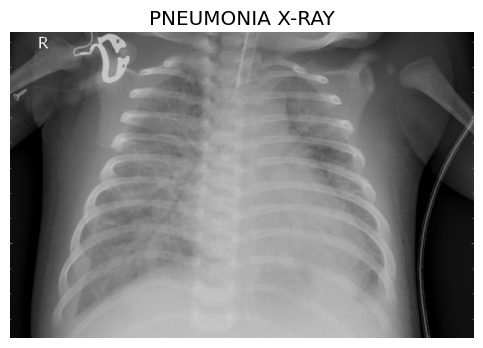

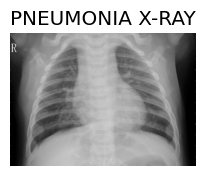

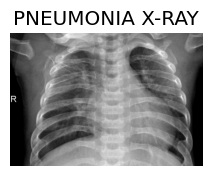

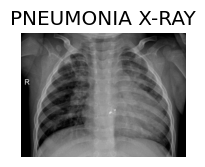

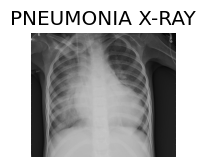

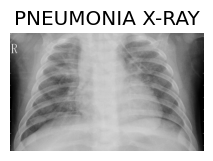

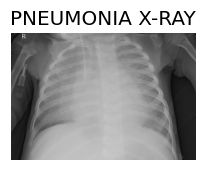

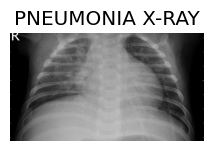

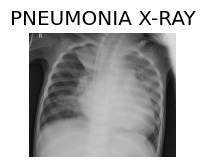

In [10]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img= plt.imread(os.path.join(penomina_dir,pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("PNEUMONIA X-RAY")
    plt.tight_layout()
    plt.show()

In [11]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir="chest_xray/train/NORMAL"

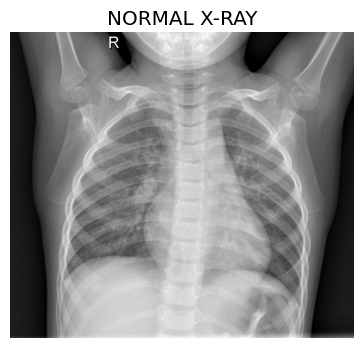

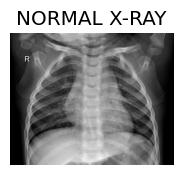

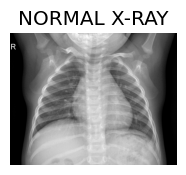

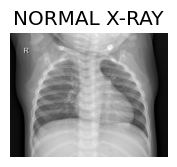

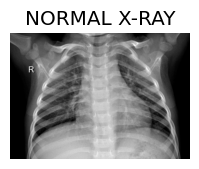

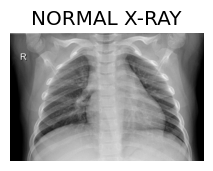

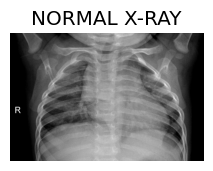

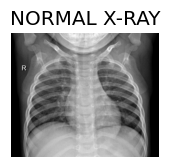

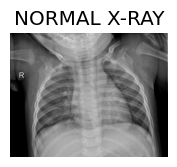

In [12]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img= plt.imread(os.path.join(normal_dir,normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("NORMAL X-RAY")
    plt.tight_layout()
    plt.show()

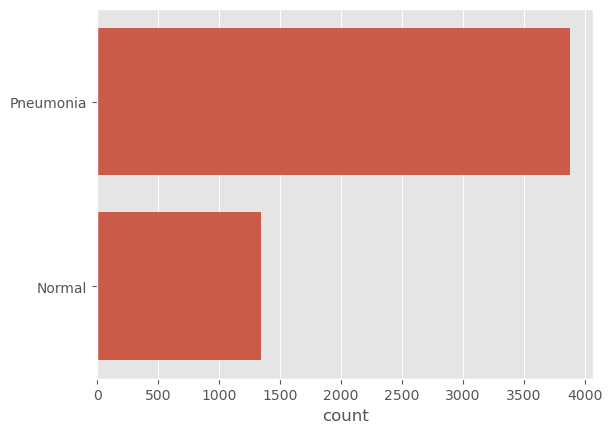

In [13]:
listx=[]
for i in train:
    if(i[1]==0):
        listx.append("Pneumonia")
    else:
        listx.append("Normal")
sns.countplot(listx)
plt.show()

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
import tensorflow as tf

In [16]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [18]:
train_datagen= ImageDataGenerator(rescale =1. / 255,
                                  horizontal_flip=0.4,
                                  vertical_flip=0.4,
                                  rotation_range=40,
                                  shear_range=0.2,
                                  width_shift_range=0.4,
                                  height_shift_range=0.4,
                                  fill_mode="nearest")
valid_datagen= ImageDataGenerator(rescale = 1./255)
test_datagen= ImageDataGenerator(rescale= 1./255)


In [19]:
train_generator= train_datagen.flow_from_directory("chest_xray/chest_xray/train",
                                                   batch_size=32,
                                                   target_size=(128,128),
                                                   class_mode ='binary',
                                                   shuffle=True,
                                                   seed=42,
                                                   color_mode='rgb')
valid_generator= valid_datagen.flow_from_directory("chest_xray/chest_xray/val",
                                                   batch_size=32,
                                                   target_size=(128,128),
                                                   class_mode ='binary',
                                                   shuffle=True,
                                                   seed=42,
                                                   color_mode='rgb')
test_generator= test_datagen.flow_from_directory("chest_xray/chest_xray/test",
                                                   batch_size=32,
                                                   target_size=(128,128),
                                                   class_mode ='binary',
                                                   shuffle=True,
                                                   seed=42,
                                                   color_mode='rgb')

                                  

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
class_labels=train_generator.class_indices
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [21]:
class_name = {value:key for(key,value) in class_labels.items()}
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

In [22]:
#VGG19 CNN ARCHITECTURE 

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
base_model = VGG19(input_shape=(123, 123, 3),
                   include_top=False,
                   weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
dropout = Dropout(0.2)(class_1)  # Removed stray "["
class_2 = Dense(1152, activation='relu')(dropout)  # Added parentheses around input
output = Dense(2, activation='sigmoid')(class_2)


model_01 = Model(base_model.inputs, output)



      

In [24]:
#incremental (fine tuning)

In [25]:
base_model=VGG19(include_top=False, input_shape=(128,128,3))
base_model_layer_names = [layer.name for layer in base_model.layers]

x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
dropout = Dropout(0.2)(class_1)  # Removed stray "["
class_2 = Dense(1152, activation='relu')(dropout)  # Added parentheses around input
output = Dense(2, activation='softmax')(class_2)



set_trainable = False
for layer in base_model.layers:
    if layer.name in [ 'block_conv3','block_conv4']:
        set_trainable=True
    else:
        set_trainable=False
       


In [26]:
base_model=VGG19(include_top=False, input_shape=(128,128,3))


x = base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation='relu')(flat)
dropout = Dropout(0.2)(class_1)  # Removed stray "["
class_2 = Dense(1152, activation='relu')(dropout)  # Added parentheses around input
output = Dense(2, activation='softmax')(class_2)

model_03 = Model(base_model.inputs, output)



In [27]:
from tensorflow.keras.applications.vgg16 import VGG16

In [28]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
img_size= 128
base_model_1 = VGG16(input_shape=(img_size, img_size, 3), 
                     include_top=False, 
                     weights='imagenet')

for layer in base_model_1.layers:
    layer.trainable = False

x = Flatten()(base_model_1.output)
x = Dense(255, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Fixed model definition
model_d = Model(inputs=base_model_1.input, outputs=predictions)

# Fixed compile method
model_d.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])  # Metrics as list

# Fixed fit method
history_d = model_d.fit(train_generator, 
                        epochs=10, 
                        validation_data=valid_generator)


C:\Users\anita\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 608s 4s/step - accuracy: 0.8059 - loss: 0.4374 - val_accuracy: 0.9375 - val_loss: 0.2406
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 596s 4s/step - accuracy: 0.8940 - loss: 0.2514 - val_accuracy: 0.7500 - val_loss: 0.3648
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 595s 4s/step - accuracy: 0.9016 - loss: 0.2364 - val_accuracy: 0.8750 - val_loss: 0.2335
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 0.9059 - loss: 0.2132 - val_accuracy: 0.7500 - val_loss: 0.6931
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9122 - loss: 0.2222 - val_accuracy: 0.7500 - val_loss: 0.4077
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.9096 - loss: 0.2042 - val_accuracy: 0.7500 - val_loss: 0.8862
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.9195 - loss: 0.2061 - val_accuracy: 0.8125 - val_loss: 0.2995
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.9234 - loss: 0.1936 - val_accu

In [29]:
tf.keras.models.save_model(model_d,'my_model2.hdf5')

In [30]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [31]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps

# Load the model only once using Streamlit caching
@st.cache_resource()
def load_model():
    model = tf.keras.models.load_model("my_model2.hdf5")
    return model

model_d = load_model()

# App title
st.title("Pneumonia Classification from Chest X-ray")

# File uploader widget
file = st.file_uploader("Please upload a chest X-ray image", type=["jpg", "png"])

# Function to preprocess and predict
def import_and_predict(image_data, model):
    size = (128, 128)  # Adjust if your model uses a different input size
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img = img.astype(np.float32) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)     # Add batch dimension
    prediction = model.predict(img)
    return prediction

# When a file is uploaded
if file is not None:
    image = Image.open(file)
    st.image(image, caption="Uploaded Image", use_column_width=True)

    prediction = import_and_predict(image, model_d)

    # Assuming binary classification (0 = Normal, 1 = Pneumonia)
    if prediction[0][0] > 0.5:
        st.markdown("### 🟥 Prediction: *Pneumonia Detected* ")
        st.markdown(f"*Confidence:* {prediction[0][0]*100:.2f}%")
    else:
        st.markdown("### 🟩 Prediction: *Normal* ")
        st.markdown(f"*Confidence:* {(1 - prediction[0][0])*100:.2f}%")

Writing app.py
